In [1]:
import pandas as pd
import numpy as np
import random
import plotly as px
import plotly_express as go

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

color_pal = sns.color_palette("husl", 9)
plt.style.use('dark_background')
warnings.filterwarnings('ignore')


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [2]:
df = pd.read_excel('PQDataSubstations.xlsx')
df

,Time [UTC],U1(Avg) [kV],U2(Avg) [kV],U3(Avg) [kV]
0,2022-07-21 15:40:00,75.65,76.29,76.19
1,2022-07-21 15:45:00,75.47,76.13,76.02
2,2022-07-21 15:50:00,75.76,76.40,76.28
3,2022-07-21 15:55:00,75.71,76.34,76.22
4,2022-07-21 16:00:00,75.73,76.37,76.25
...,...,...,...,...
17275,2022-09-19 15:15:00,74.89,75.62,75.41
17276,2022-09-19 15:20:00,74.45,75.17,74.97
17277,2022-09-19 15:25:00,75.57,76.24,76.05
17278,2022-09-19 15:30:00,75.57,76.25,76.05


In [23]:
df.columns

Index(['Time [UTC]', 'U1(Avg) [kV]', 'U2(Avg) [kV]', 'U3(Avg) [kV]'], dtype='object')

In [4]:
df.describe()

,U1(Avg) [kV],U2(Avg) [kV],U3(Avg) [kV]
count,17280.000000,17280.000000,17280.000000
mean,73.878948,74.560423,74.468377
std,5.648724,5.699342,5.685773
min,0.040000,0.000000,0.000000
25%,73.260000,73.950000,73.870000
50%,74.300000,74.990000,74.900000
75%,75.290000,75.980000,75.870000
max,81.910000,82.700000,82.050000


In [5]:
df.tail()

,Time [UTC],U1(Avg) [kV],U2(Avg) [kV],U3(Avg) [kV]
17275,2022-09-19 15:15:00,74.89,75.62,75.41
17276,2022-09-19 15:20:00,74.45,75.17,74.97
17277,2022-09-19 15:25:00,75.57,76.24,76.05
17278,2022-09-19 15:30:00,75.57,76.25,76.05
17279,2022-09-19 15:35:00,75.30,75.99,75.80


In [6]:
dfr = pd.read_csv("RabaiSub.csv")
dfr

,Datetime,AvgKv1,AvgKv2,AvgKv3
0,7/21/2022 12:35,74.49,74.55,74.51
1,7/21/2022 12:40,74.73,74.82,74.74
2,7/21/2022 12:45,74.96,75.04,74.97
3,7/21/2022 12:50,75.87,75.93,75.87
4,7/21/2022 12:55,75.32,75.39,75.35
...,...,...,...,...
17275,9/19/2022 12:11,77.90,78.86,77.95
17276,9/19/2022 12:16,78.04,78.97,78.06
17277,9/19/2022 12:21,78.39,79.33,78.40
17278,9/19/2022 12:26,77.42,78.36,77.44


In [7]:
dfr.describe()

,AvgKv1,AvgKv2,AvgKv3
count,17280.000000,17280.000000,17280.000000
mean,76.688218,77.185525,76.702061
std,1.306609,1.350671,1.291888
min,71.410000,71.560000,71.490000
25%,75.780000,76.260000,75.810000
50%,76.770000,77.260000,76.780000
75%,77.640000,78.150000,77.630000
max,82.410000,83.470000,82.440000


In [8]:
dfr

,Datetime,AvgKv1,AvgKv2,AvgKv3
0,7/21/2022 12:35,74.49,74.55,74.51
1,7/21/2022 12:40,74.73,74.82,74.74
2,7/21/2022 12:45,74.96,75.04,74.97
3,7/21/2022 12:50,75.87,75.93,75.87
4,7/21/2022 12:55,75.32,75.39,75.35
...,...,...,...,...
17275,9/19/2022 12:11,77.90,78.86,77.95
17276,9/19/2022 12:16,78.04,78.97,78.06
17277,9/19/2022 12:21,78.39,79.33,78.40
17278,9/19/2022 12:26,77.42,78.36,77.44


In [16]:

dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17280 entries, 7/21/2022 12:35 to 9/19/2022 12:31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AvgKv1  17280 non-null  float64
 1   AvgKv2  17280 non-null  float64
 2   AvgKv3  17280 non-null  float64
dtypes: float64(3)
memory usage: 540.0+ KB


In [22]:
date_col = pd.DatetimeIndex(dfr["Datetime"])
dfr["Year"] = date_col.year

KeyError: 'Datetime'

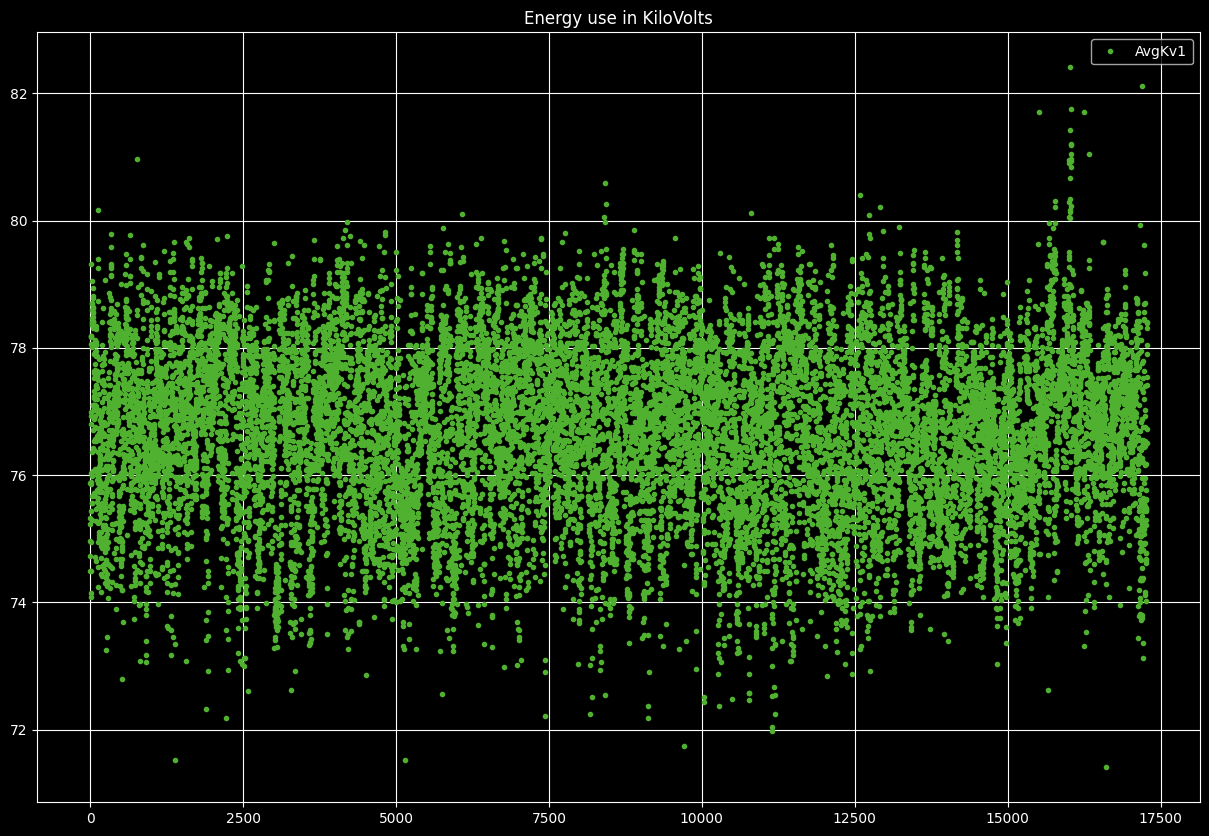

In [30]:
# Setting Datetime column as index
dfr.set_index('Datetime')
dfr.plot(style='.',figsize=(15,10),color=color_pal[3],title='Energy use in KiloVolts')
plt.grid()

In [12]:
df_kilifi = pd.read_csv("KilifiSub.csv")
df_kilifi

,Datetime,AvgKv1,AvgKv2,AvgKv3
0,7/21/2022 15:40,75.65,76.29,76.19
1,7/21/2022 15:45,75.47,76.13,76.02
2,7/21/2022 15:50,75.76,76.40,76.28
3,7/21/2022 15:55,75.71,76.34,76.22
4,7/21/2022 16:00,75.73,76.37,76.25
...,...,...,...,...
17275,9/19/2022 15:15,74.89,75.62,75.41
17276,9/19/2022 15:20,74.45,75.17,74.97
17277,9/19/2022 15:25,75.57,76.24,76.05
17278,9/19/2022 15:30,75.57,76.25,76.05


In [13]:
df_kilifi.describe()

,AvgKv1,AvgKv2,AvgKv3
count,17280.000000,17280.000000,17280.000000
mean,73.878948,74.560423,74.468377
std,5.648724,5.699342,5.685773
min,0.040000,0.000000,0.000000
25%,73.260000,73.950000,73.870000
50%,74.300000,74.990000,74.900000
75%,75.290000,75.980000,75.870000
max,81.910000,82.700000,82.050000


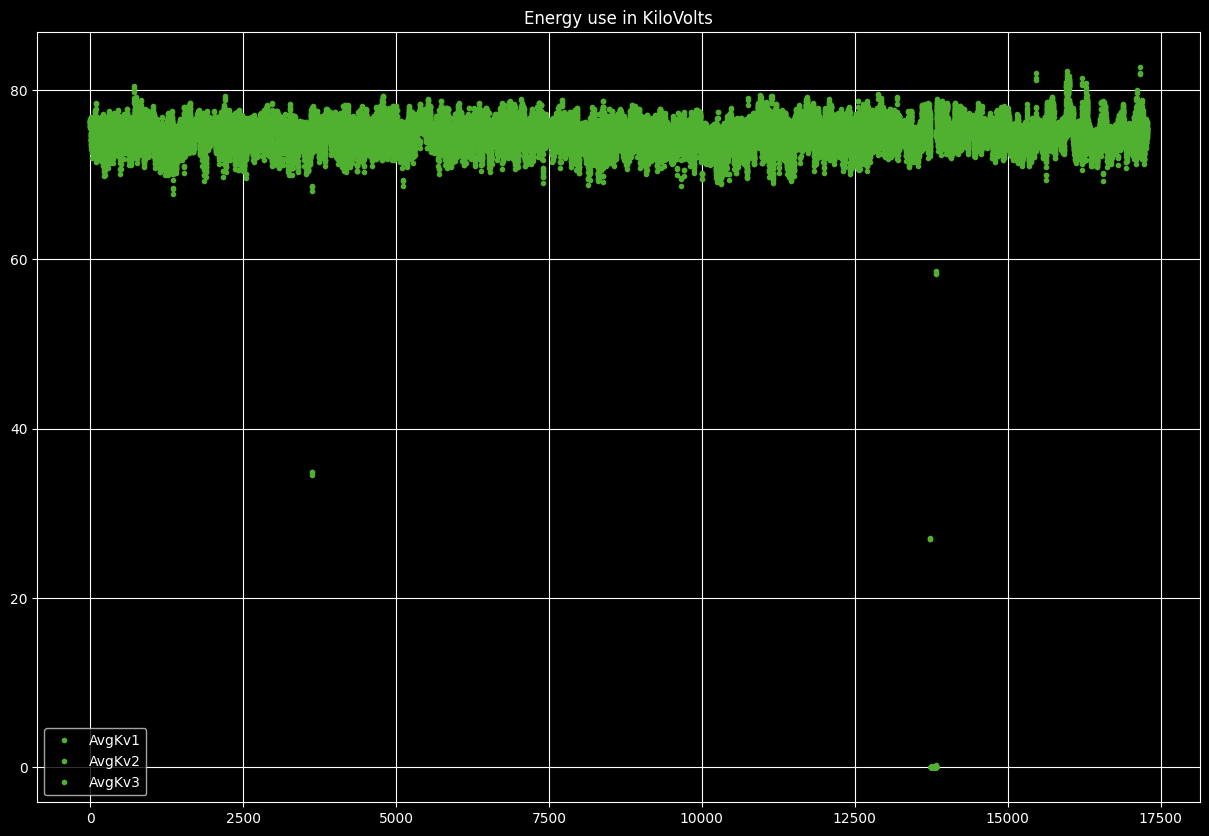

In [15]:
# Setting Datetime column as index
df_kilifi.set_index('Datetime')
df_kilifi.plot(style='.',figsize=(15,10),color=color_pal[3],title='Energy use in KiloVolts')
plt.grid()